In [1]:
import tensorflow as tf
from preprocess_data import preprocess_data
from tensorflow.python.keras import layers, models, optimizers, losses

## Creating the model

In [2]:
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(400, 400, 3)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

Metal device set to: Apple M2 Pro


2023-03-27 12:15:39.749395: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-27 12:15:39.749418: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 398, 398, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 396, 396, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 198, 198, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 194, 194, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 97, 97, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 95, 95, 256)       2

### Importing the data

In [4]:
train_data, test_data, val_data = preprocess_data(skip_test=True, img_size=(400, 400))

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [11]:
model.compile(optimizer=optimizers.rmsprop_v2.RMSprop(learning_rate=0.0001),
              loss=losses.BinaryCrossentropy(),
              metrics=['acc'])

In [12]:
random_results = model.evaluate(train_data, verbose=2)

2023-03-27 12:16:44.436445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


163/163 - 147s - loss: 0.6931 - acc: 0.7312


### Random results:
Approximately 0.74 accuracy and 0.68 loss

## Training the model

In [ ]:
history = model.fit(train_data, epochs=10,
                    validation_data=test_data)

Epoch 1/10


2023-03-27 12:19:35.754629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  3/163 [..............................] - ETA: 1:10:49 - loss: 0.6373 - acc: 5.3084e-08

In [18]:
test = model.evaluate(test_data, verbose=2)

20/20 - 5s - loss: 1.7532 - acc: 0.7756


In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data, verbose=2)

NameError: name 'history' is not defined

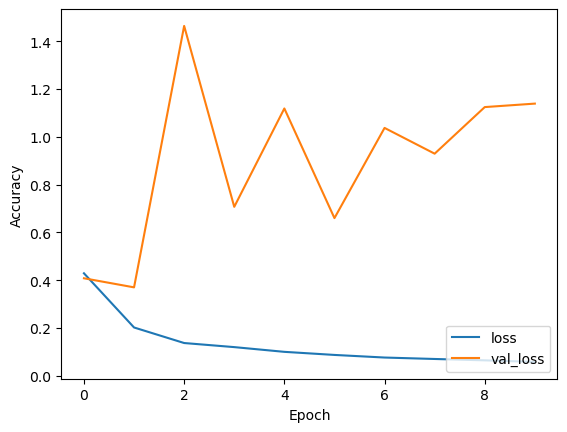

In [13]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')